In [39]:
import numpy as np
import pandas as pd

In [41]:
data = pd.read_csv("Dataset.csv", sep=";", na_values="Unknown")

In [42]:
df = data.copy()

In [43]:
df.drop('CLIENTNUM', 1, inplace=True)

In [44]:
df["Attrition_Flag"].value_counts(normalize=True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Nous avons deux modalités pour la variable cible `Attrition_Flag`

- **Existing Customer**: 0
- **Attrited Customer**: 1

***On remarque une forte inegalité entre les proportions des modalités***

### Pourcentage de données manquantes par variable

In [45]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

Il n'y a pas de valeur manquante dans les variables quantitatives.

Seule trois variables possèdent des donnés manquante dont le pourcentage est inférieur à 15%

In [46]:
df_line = df.shape
# Récupperer le nombre de lignes manquantes
index_with_nan = df.index[df.isnull().any(axis=1)]
nbr_df_nan = len(np.array(index_with_nan).reshape(-1, 1))
print(f"Ligne du dataframe: {df_line[0]}")
print(f"Nombre de ligne manquante: {nbr_df_nan} \nRatio de ligne manquante: {(nbr_df_nan/df_line[0])*100}")

Ligne du dataframe: 10127
Nombre de ligne manquante: 3046 
Ratio de ligne manquante: 30.07800928211711


In [47]:
# Suppresion des données manquantes
df.drop(index_with_nan, 0, inplace=True)
df.shape[0]

7081

In [48]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

Il n' y a plus de données manquantes Dataset

# Prétraitement
### Donnée entraînement et de test

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0, stratify=df['Attrition_Flag'])

In [81]:
# On fait une découpe en respectant la repartition des données
train = trainset['Attrition_Flag'].value_counts(normalize=True)
test = testset['Attrition_Flag'].value_counts(normalize=True)
print(f"Donnée d'entrainement:\n{train}\n\n")
print(f"Donnée de test:\n{test}")

Donnée d'entrainement:
Existing Customer    0.84275
Attrited Customer    0.15725
Name: Attrition_Flag, dtype: float64


Donnée de test:
Existing Customer    0.843027
Attrited Customer    0.156973
Name: Attrition_Flag, dtype: float64


### Encodage des variable qualitatives ordinales

In [52]:

def encode_features_ordinal(dataframe):
    '''
    Fonction permetant d'encoder des variables qualitatives ordinales
    :param dataframe: Fournir un dataframe
    :param variable: Fournir la liste de variable
    '''
    features_ordinals = ['Education_Level', 'Income_Category', 'Card_Category']
    modalite = {
    'Uneducated': 0,
    'College': 1,
    'High School': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
    }
    for col in features_ordinals:
        if dataframe[col].dtype == object:
            dataframe.loc[:,col] = dataframe[col].map(modalite)
    
    return dataframe

In [53]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

### Encodage des variable qualitatives nominales

In [54]:
def encodin_nominale(datframe):
    """
    Fonction permetant de faire l'encodage des varibles qualitative nominale 
    en supprimant la variable dependante
    """
    features_nominals = ['Marital_Status', 'Gender']
    
    for var in features_nominals:
        if datframe[var].dtypes == 'object':
            modalite = datframe[var].unique()
            for index, mod in enumerate(modalite):
                if index == 0:
                    continue
                datframe[mod] = np.where(datframe[var]==mod, 1, 0)
            datframe.drop(columns=var,axis=1,inplace=True)
            
    return datframe

In [55]:
def preprocessing(dataframe):
    
    Y = dataframe['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
    X = dataframe.drop('Attrition_Flag', axis=1)
    
    X = encode_features_ordinal(X)
    X = encodin_nominale(X)
    
    return X, Y
 

In [56]:
X_train, Y_train = preprocessing(trainset)

In [59]:
X_test, Y_test = preprocessing(testset)

# Modelisation & Evaluation

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import sklearn.metrics as metrics

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
log = LogisticRegression(random_state=0)
# model_tree = DecisionTreeClassifier(random_state=0)
model_svc = SVC(random_state=0)
model_boost = AdaBoostClassifier(random_state=0)
modele_rf = RandomForestClassifier(random_state=0)

In [76]:
dict_of_models = {'RandomForest': modele_rf,
                  'AdaBoost' : model_boost,
                  'SVM': model_svc,
                  'LogisticRegression': log
#                   'DecisionTreeClassifier': DecisionTreeClassifier
                 }

In [77]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    
    print(f"Entraînement: {model.score(X_train, Y_train)}\nTest: {model.score(X_test, Y_test)}")
    print(pd.DataFrame(confusion_matrix(Y_test, ypred)))
    print(classification_report(Y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(model, fontsize=24)
    plt.legend()

RandomForest
Entraînement: 1.0
Test: 0.948051948051948
      0    1
0  1472   21
1    71  207
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1493
           1       0.91      0.74      0.82       278

    accuracy                           0.95      1771
   macro avg       0.93      0.87      0.89      1771
weighted avg       0.95      0.95      0.95      1771

AdaBoost
Entraînement: 0.9625235404896422
Test: 0.9542631281761716
      0    1
0  1462   31
1    50  228
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1493
           1       0.88      0.82      0.85       278

    accuracy                           0.95      1771
   macro avg       0.92      0.90      0.91      1771
weighted avg       0.95      0.95      0.95      1771

SVM
Entraînement: 0.8427495291902072
Test: 0.8430265386787126
      0  1
0  1493  0
1   278  0
              precision    recall  f1-score   suppo

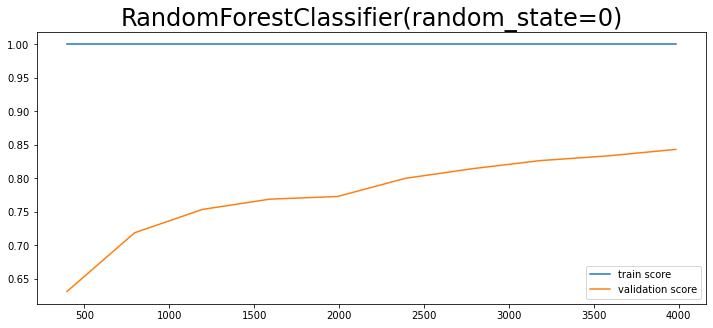

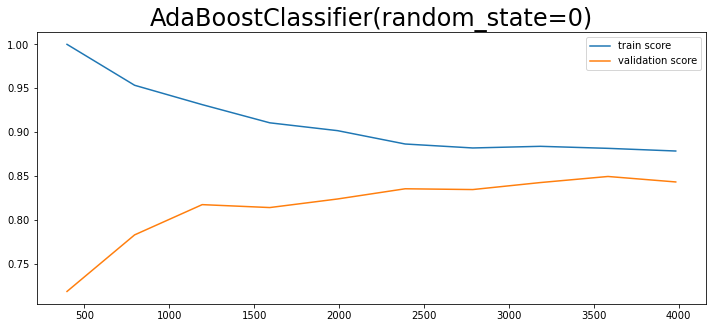

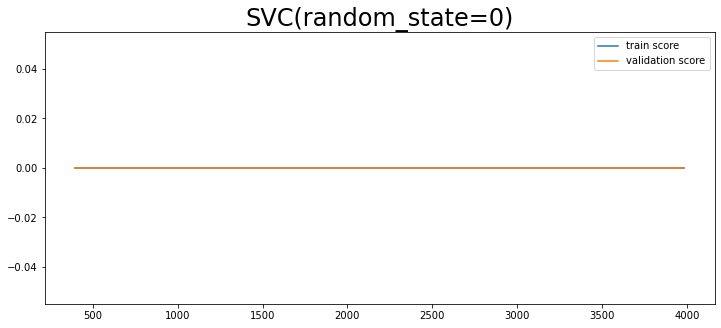

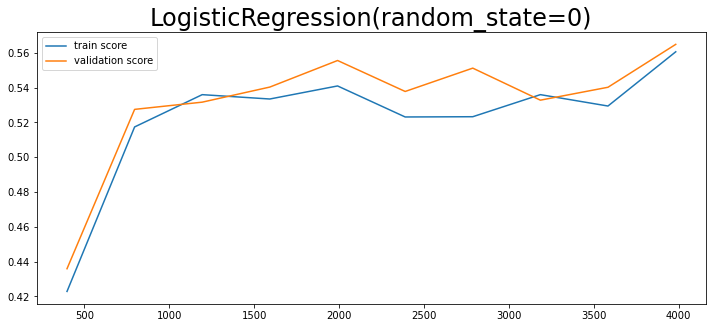

In [78]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

**Dans cet exemple le meilleur modèle est le Adaboost**

Nous pourions envisager de travailler avec:
- Le modèle de **`AdaBoost`**
- Le modèle de **`RandomForest`**

En nous bassant sur `l'accuracy` ***le taux de bien classé***

et le `recall` de bien classé pour ***la modalité positive***

Le Modèle SVM n'arrive pas à avoir de bonne performance